In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import datetime
import ModelsPlot as model_plot

# 宏观经济变量预测通货膨胀
# RF&GBDT

In [5]:
Macro_data = pd.read_csv('CHN_Macro_sample.csv',index_col=0)
Ys_table = pd.read_csv('CHN_Marco_predictors.csv',index_col=0)

In [7]:
Ys_table

,Dates,Vol,GDPgrowth,CPIgrowth
0,201001,NaN,0.011717,0.000647
1,201002,0.011860,0.004381,0.002274
2,201003,0.011035,0.011714,0.001385
3,201004,0.013347,0.007262,0.004151
4,201005,0.020415,0.006281,0.003650
...,...,...,...,...
115,201908,0.009535,0.002547,0.003299
116,201909,0.008018,-0.000274,0.005212
117,201910,0.006704,0.001223,0.008401
118,201911,0.006433,0.007186,0.007219


In [8]:
used_Ytable = Ys_table[['Dates','CPIgrowth']]
merged = pd.merge(Macro_data,used_Ytable,on = 'Dates')

st_month = 201001
ed_month = 201912
Xtodrop = ['Dates','y']##删掉预测值和不能用的指标
Xtodrop_add = [x for x in merged.columns if 'CPI' in x or 'cpi' in x]
Xtodrop = Xtodrop + Xtodrop_add

merged['y'] = merged['CPIgrowth'].shift(-1)##预测变量，预测下一个月
whole_data = merged[(merged['Dates']>=st_month) & (merged['Dates']<=ed_month)].reset_index(drop = True)
whole_data = whole_data.fillna(0)

In [13]:
def Norm(in_df,no_Norm):
    op_df = in_df.copy()
    for col in op_df.columns:
        if col in no_Norm:
            continue
        else:
            col_max = max(op_df[col])
            col_min = min(op_df[col])
            if col_max == col_min:
                continue
            op_df[col] = (op_df[col] - col_min) / (col_max - col_min)
    return op_df

In [ ]:
all_month_list = list(whole_data['Dates'].values)
train_month_n = 24
test_month_n = 12
oos_month_n = 1

rf_op = []
gbdt_op = []

for i in range(len(all_month_list)):
    if i < train_month_n + test_month_n + oos_month_n - 1:
        continue
    else:
        
        train_monthes = all_month_list[i-test_month_n-train_month_n:i-test_month_n]
        test_monthes = all_month_list[i-test_month_n:i]
        oos_month = all_month_list[i]
        print(oos_month)
        
        train_data = whole_data[whole_data['Dates'].apply(lambda x: True if x in train_monthes else False)]
        test_data = whole_data[whole_data['Dates'].apply(lambda x: True if x in test_monthes else False)]
        oos_data = whole_data[whole_data['Dates'] == oos_month]
        

        
        X_train = train_data.drop(columns = Xtodrop)
        y_train = train_data['y']
        
        X_test = test_data.drop(columns = Xtodrop)
        y_test = test_data['y']
        
        X_oos = oos_data.drop(columns = Xtodrop)
        y_oos = oos_data['y']
        
        to_Norm = pd.concat([train_data,test_data,oos_data])
        normed_data = Norm(to_Norm,Xtodrop)
        train_data_normed = normed_data[normed_data['Dates'].apply(lambda x: True if x in train_monthes else False)]
        test_data_normed = normed_data[normed_data['Dates'].apply(lambda x: True if x in test_monthes else False)]
        oos_data_normed = normed_data[normed_data['Dates'] == oos_month]
        
        X_train_normed = train_data_normed.drop(columns = Xtodrop)
        y_train = train_data['y']
        
        X_test_normed = test_data_normed.drop(columns = Xtodrop)
        y_test = test_data['y']
        
        X_oos_normed = oos_data_normed.drop(columns = Xtodrop)
        y_oos = oos_data['y']
        
       
        rf_result = model_plot.RandomForest_method(X_train,y_train,X_test,y_test,X_oos, test_data, oos_data)
        gbdt_result = model_plot.GBDT_method(X_train,y_train,X_test,y_test,X_oos, test_data, oos_data)
        
        rf_op.append(rf_result)
        gbdt_op.append(gbdt_result)
        

201301.0
201302.0
201303.0
201304.0


201305.0
201306.0
201307.0


201308.0
201309.0
201310.0


201311.0
201312.0


201401.0
201402.0
201403.0


201404.0
201405.0
201406.0


201407.0
201408.0
201409.0


201410.0
201411.0


201412.0
201501.0
201502.0


201503.0
201504.0
201505.0


201506.0
201507.0
201508.0


201509.0
201510.0


201511.0
201512.0
201601.0


201602.0
201603.0
201604.0


201605.0
201606.0
201607.0


201608.0
201609.0


201610.0
201611.0
201612.0


201701.0
201702.0
201703.0


201704.0
201705.0
201706.0


201707.0
201708.0


201709.0
201710.0
201711.0


201712.0
201801.0
201802.0


201803.0
201804.0
201805.0


201806.0
201807.0


201808.0
201809.0
201810.0


201811.0
201812.0
201901.0


201902.0
201903.0
201904.0


201905.0
201906.0


201910.0
201911.0


201912.0


# RF

MSFE:  9.666131831333673e-06
R2: (n = 2) -0.11089208565193465


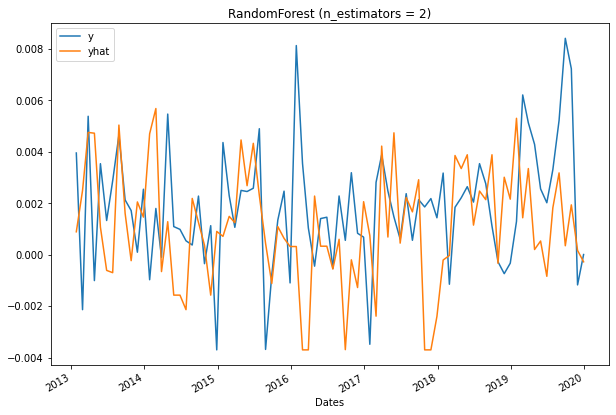

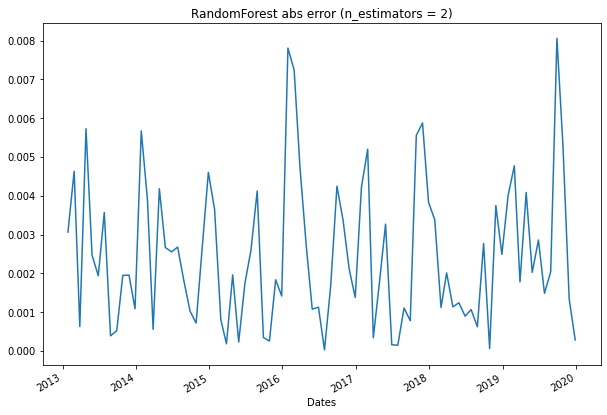

MSFE:  9.474909321084984e-06
R2: (n = 3) -0.08891560354508399


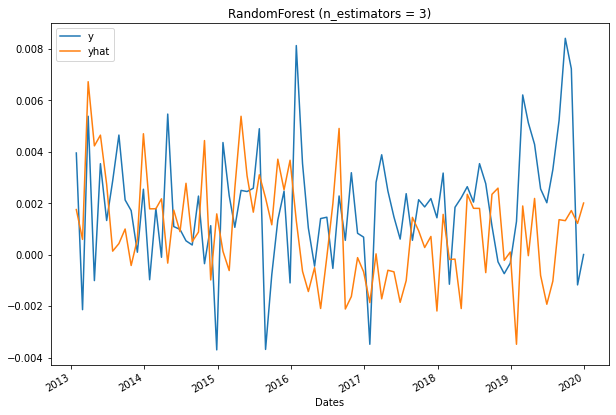

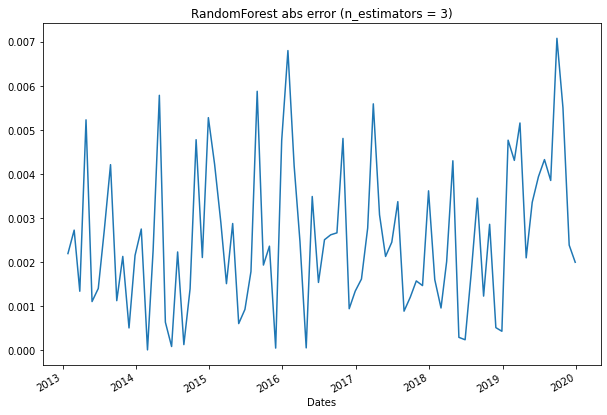

MSFE:  7.964450464789805e-06
R2: (n = 4) 0.0846757376905003


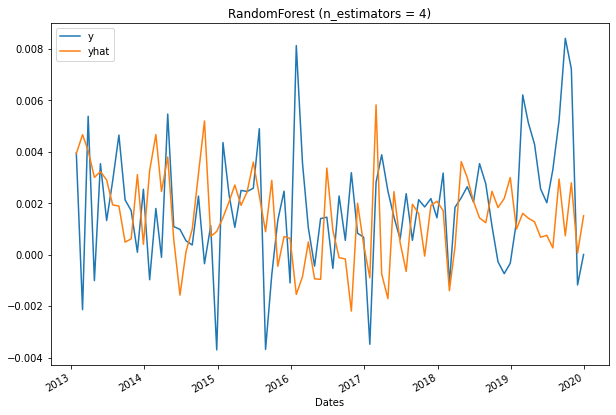

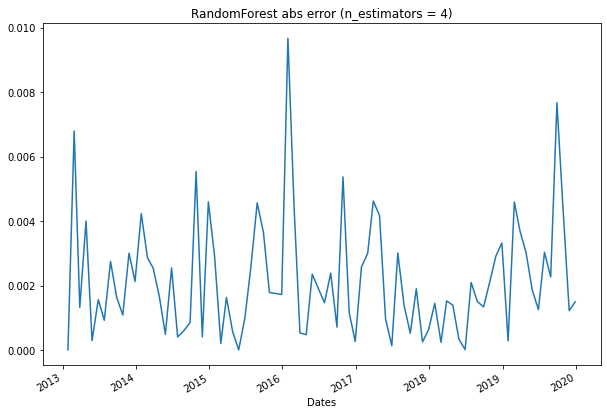

MSFE:  7.4572945033855455e-06
R2: (n = 5) 0.14296126012553378


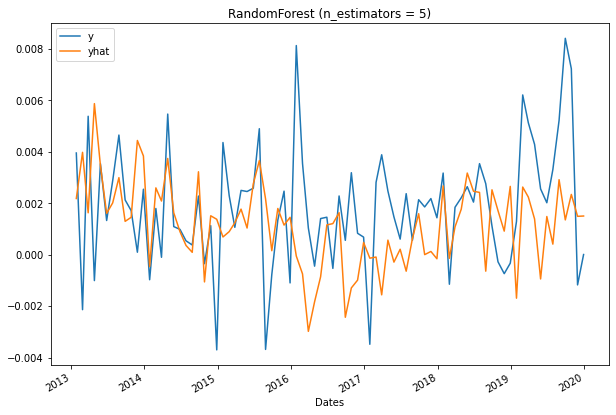

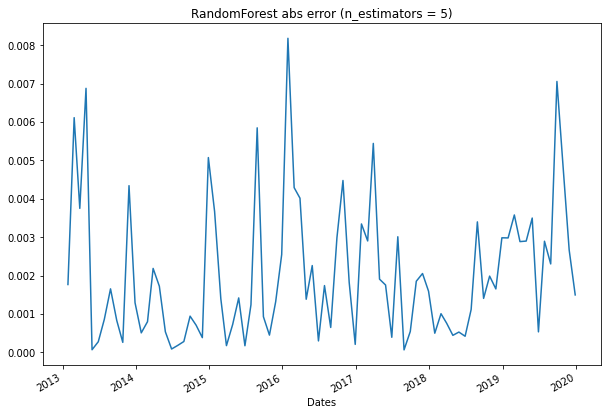

MSFE:  8.606391639372108e-06
R2: (n = 6) 0.010899858906608828


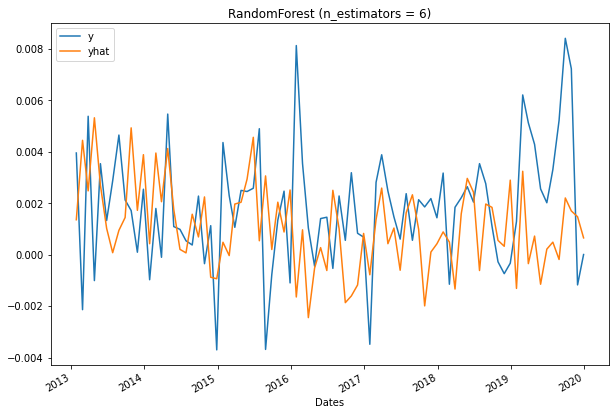

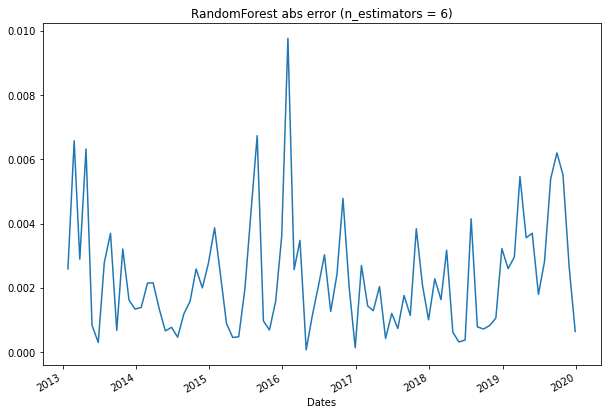

In [25]:
# deal with randomforest
all_pred = []
all_best = []
all_coef = []
for i in range(len(all_month_list)):
    if i < train_month_n + test_month_n + oos_month_n - 1:
        continue
    else:
        result_idx = i - (train_month_n + test_month_n + oos_month_n - 1)
        oos_month = all_month_list[i]
        
        temp_tuning = rf_op[result_idx][0]
        temp_best = rf_op[result_idx][1]
        temp_coef = rf_op[result_idx][2]
        
        all_best.append(temp_best)
        
        temp_coef = pd.DataFrame(temp_coef).T
        temp_coef['AlphaValue'] = temp_coef.index
        temp_coef['Dates'] = oos_month
        all_coef.append(temp_coef)
        all_pred.append(temp_tuning)
        
        
all_pred = pd.concat(all_pred)
all_pred['Dates'] = [datetime.datetime(year = int(x//100),month = int(x%100),day = 28) for x in all_pred['Dates']]
all_pred = all_pred.sort_values(['n_estimators','Dates'])
all_pred = all_pred.set_index(['n_estimators','Dates'])

n_es = [2,3,4,5,6] 
for n in n_es:
    
    alpha_pred = all_pred.loc[n]
    msfe = np.sum((alpha_pred['yhat']-alpha_pred['y'])**2) / len(alpha_pred)
    print('MSFE: ', msfe)
    r2 = 1-np.sum((alpha_pred['yhat']-alpha_pred['y'])**2)/np.sum(alpha_pred['y']**2)
    print('R2: (n = %s)'%n, r2)
    
    alpha_pred[['y','yhat']].plot(figsize = (10,7),title = 'RandomForest (n_estimators = %s)'%n)
    plt.show()
    
    abs(alpha_pred['y']- alpha_pred['yhat']).plot(figsize = (10,7),title = 'RandomForest abs error (n_estimators = %s)'%n)
    plt.show()  


# gbdt

MSFE:  5.911193999481436e-06
R2: (n = 2) 0.320648761535554


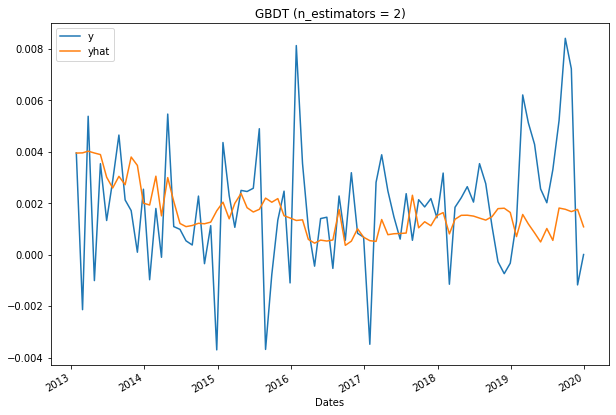

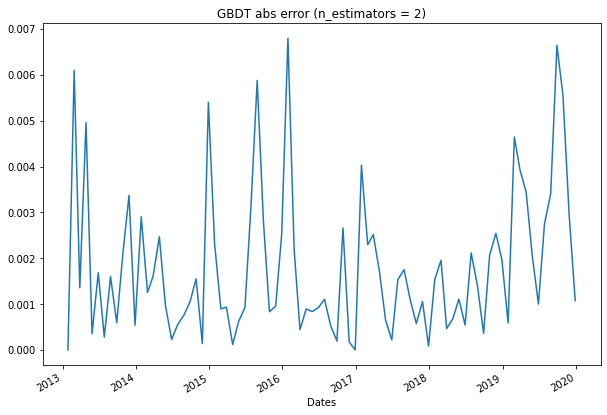

MSFE:  6.322364113658876e-06
R2: (n = 3) 0.27339453061190044


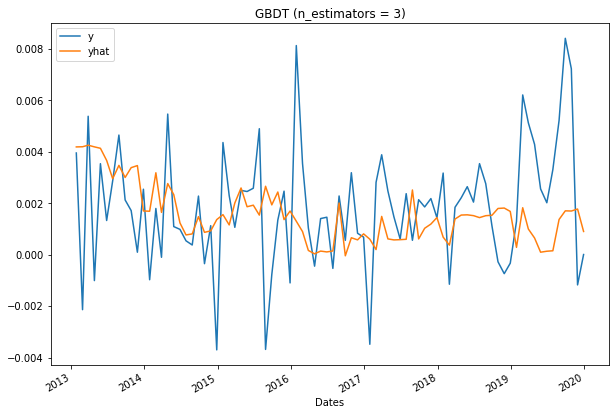

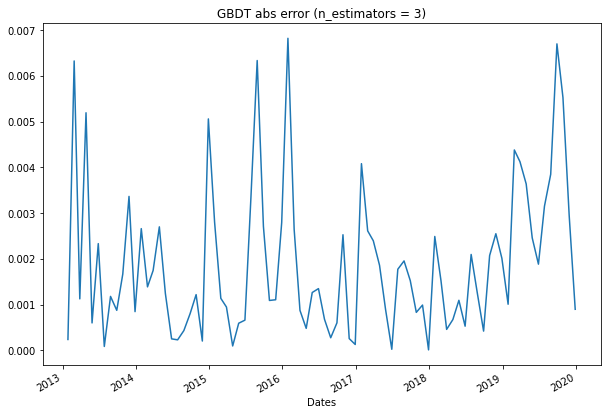

MSFE:  6.488251416027363e-06
R2: (n = 4) 0.25432972842143875


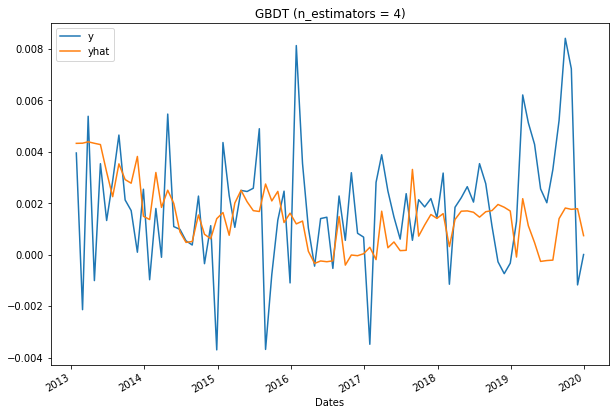

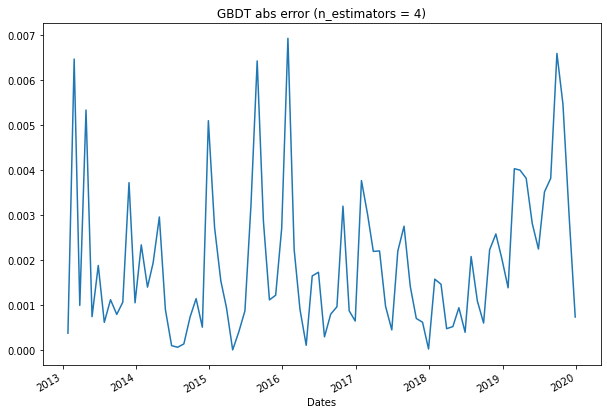

MSFE:  6.675741564431619e-06
R2: (n = 5) 0.23278219258866317


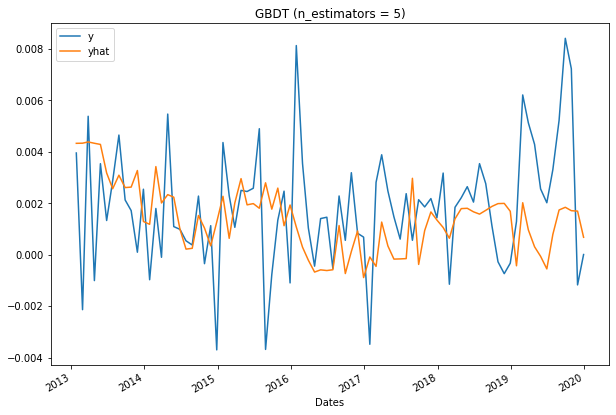

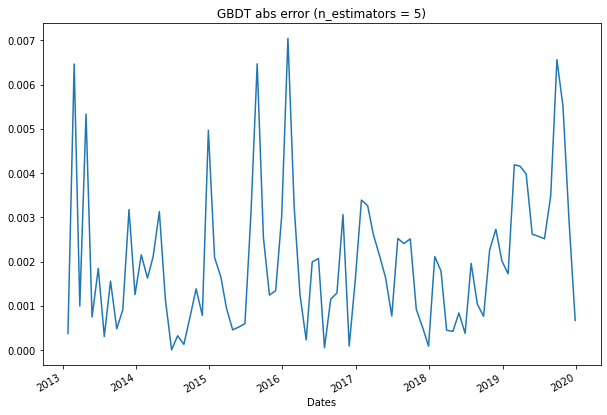

MSFE:  7.0425691108220346e-06
R2: (n = 6) 0.1906240857890784


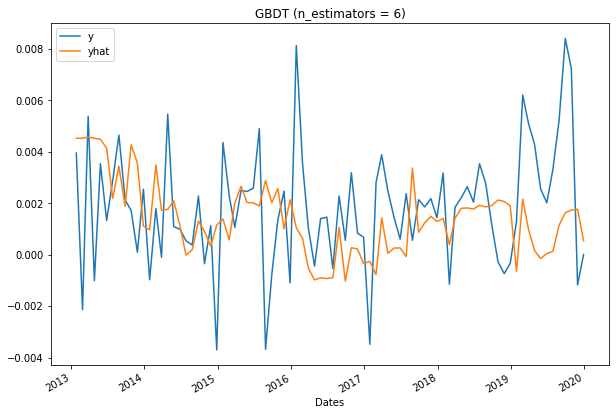

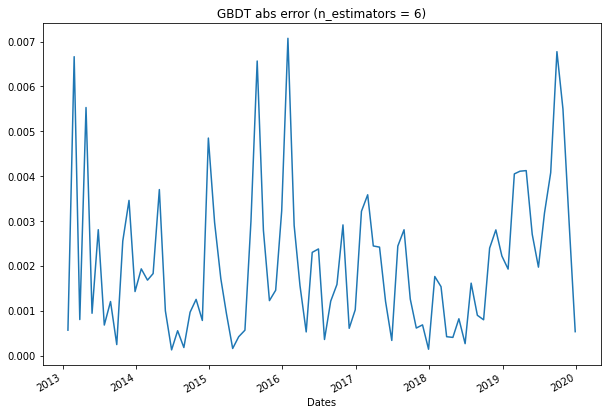

In [26]:
# deal with gbdt
all_pred = []
all_best = []
all_coef = []
for i in range(len(all_month_list)):
    if i < train_month_n + test_month_n + oos_month_n - 1:
        continue
    else:
        result_idx = i - (train_month_n + test_month_n + oos_month_n - 1)
        oos_month = all_month_list[i]
        
        temp_tuning = gbdt_op[result_idx][0]
        temp_best = gbdt_op[result_idx][1]
        temp_coef = gbdt_op[result_idx][2]
        
        all_best.append(temp_best)
        
        temp_coef = pd.DataFrame(temp_coef).T
        temp_coef['AlphaValue'] = temp_coef.index
        temp_coef['Dates'] = oos_month
        all_coef.append(temp_coef)
        all_pred.append(temp_tuning)
        
        
all_pred = pd.concat(all_pred)
all_pred['Dates'] = [datetime.datetime(year = int(x//100),month = int(x%100),day = 28) for x in all_pred['Dates']]
all_pred = all_pred.sort_values(['n_estimators','Dates'])
all_pred = all_pred.set_index(['n_estimators','Dates'])

n_es = [2,3,4,5,6] 
for n in n_es:
    
    alpha_pred = all_pred.loc[n]
    msfe = np.sum((alpha_pred['yhat']-alpha_pred['y'])**2) / len(alpha_pred)
    print('MSFE: ', msfe)
    r2 = 1-np.sum((alpha_pred['yhat']-alpha_pred['y'])**2)/np.sum(alpha_pred['y']**2)
    print('R2: (n = %s)'%n, r2)
    
    alpha_pred[['y','yhat']].plot(figsize = (10,7),title = 'GBDT (n_estimators = %s)'%n)
    plt.show()
    
    abs(alpha_pred['y']- alpha_pred['yhat']).plot(figsize = (10,7),title = 'GBDT abs error (n_estimators = %s)'%n)
    plt.show()  
